In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import contextily as ctx

# Load all .shp files from subdirectories
root_path = Path("../data/masks/SHP_BALI")
shp_files = list(root_path.glob("**/*.shp"))

gdfs = []
for shp_file in shp_files:
    try:
        gdf = gpd.read_file(shp_file)
        gdfs.append(gdf)
    except Exception as e:
        print(f"Error reading {shp_file}: {e}")

# Concatenate into one GeoDataFrame
bali_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)

/tmp/ipykernel_77329/3028428556.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bali_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)


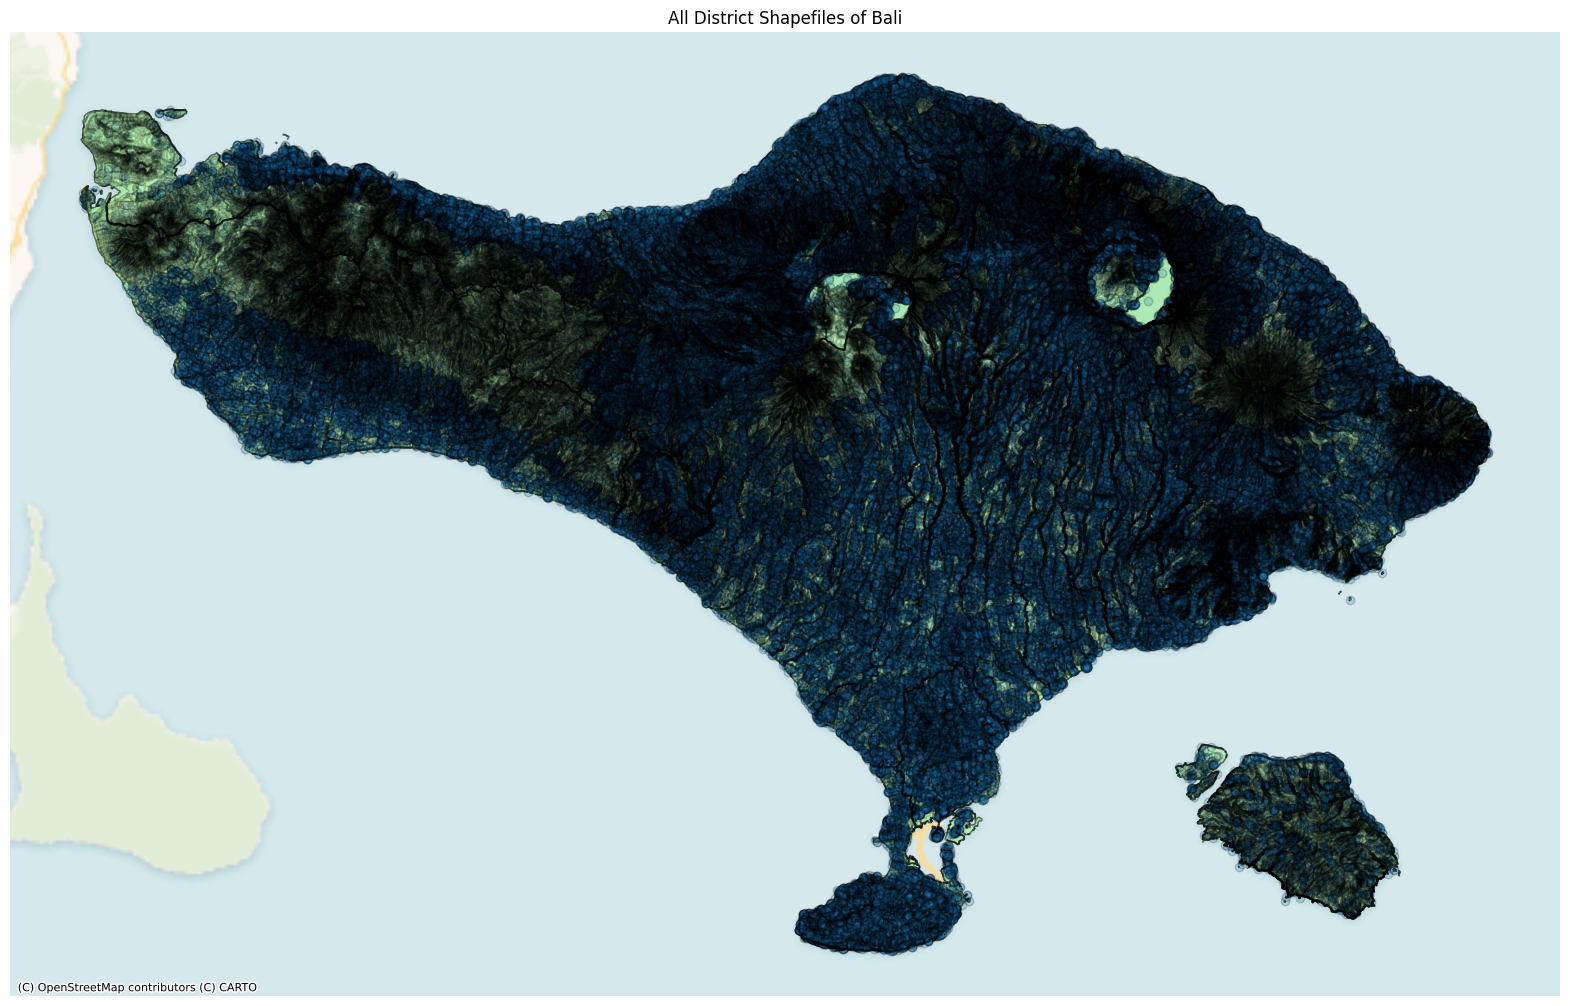

In [2]:
# Plot the district shapes
fig, ax = plt.subplots(figsize=(20, 20))
bali_gdf.to_crs(epsg=3857).plot(ax=ax, edgecolor='black', facecolor='lightgreen', alpha=0.2)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.VoyagerNoLabels)
ax.set_title("All District Shapefiles of Bali")
ax.axis("off")
plt.show()

In [3]:
# Dissolve all districts into one shape
bali_dissolved = bali_gdf.dissolve()

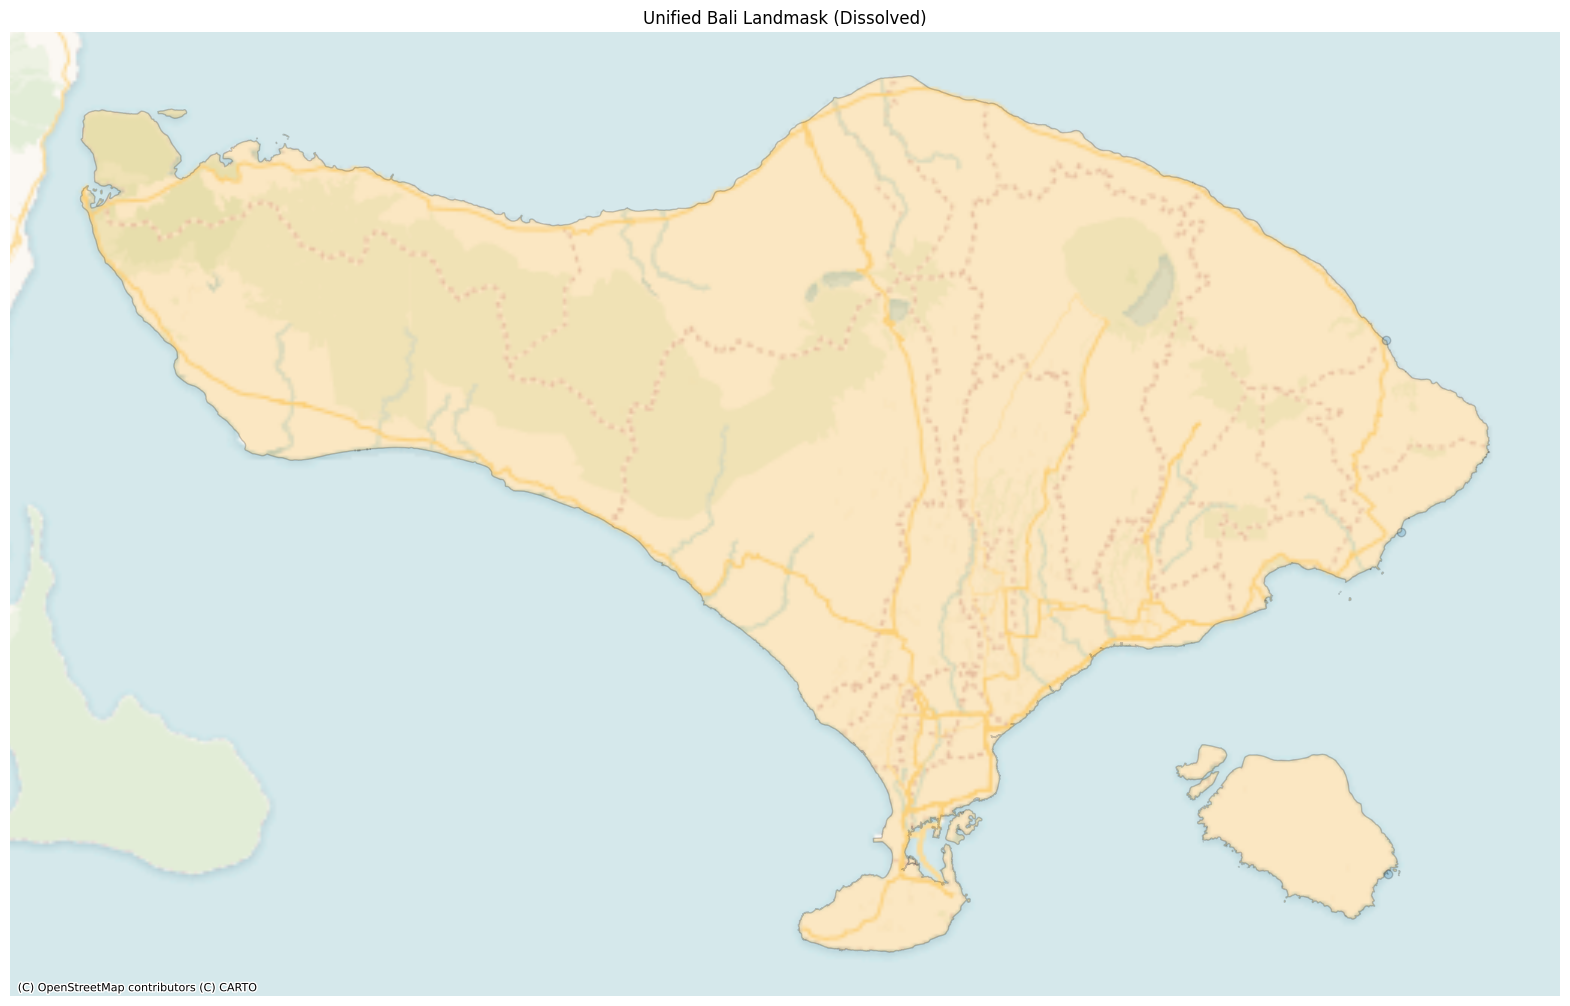

In [4]:
# Plot dissolved land mask
fig, ax = plt.subplots(figsize=(20, 20))
bali_dissolved.to_crs(epsg=3857).plot(ax=ax, edgecolor='black', facecolor='orange', alpha=0.2)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.VoyagerNoLabels)
ax.set_title("Unified Bali Landmask (Dissolved)")
ax.axis("off")
plt.show()

In [5]:
# Save as GeoJSON
output_path = Path("../data/masks/bali_merged.geojson")
bali_dissolved.to_file(output_path, driver="GeoJSON")
print(f"✅ Saved merged landmask to: {output_path}")

✅ Saved merged landmask to: ../data/masks/bali_merged.geojson
